# Limit plots
For Brazilian flag limit plots, please note the following:

- The 68% band should be in green and the 95% band in yellow.
- The shade of yellow, chosen so that it is visible in greyscale, should be `#F5BB54`. The shade of green should be `#607641`, so that the inner band appears darker than the outer band in greyscale. An alternative could be CMS logo colors (`#85D1FBff`, `#FFDF7Fff`);
- There are two general forms for the legends that have been agreed upon by physics coordination and the Statistics Committee, as shown in the examples below. It is recommended that you choose one or the other. Note that the subscript "experiment" is placed on the"σ"s in the legend of the second example to avoid conflict with "σ" (meaning cross section) on the y-axis label. For either choice of legend, the curves should be explained in the figure legend with text similar to: "The inner (green) band and the outer (yellow) band indicate the regions containing 68 and 95%, respectively, of the distribution of limits expected under the background-only hypothesis."

<img src="images/LimitPlot-example2.png" width="300"/>
<img src="images/LimitPlot-example3.png" width="300"/>


In [1]:
!pip install cmsstyle

In [2]:
!pip install mplhep

In [3]:
import ROOT
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
import cmsstyle as CMS
from array import array

Welcome to JupyROOT 6.30/04


In [4]:
x = [0., 1., 2., 3., 4.]
y = [0., 2., 4., 1., 3.]
ex = [0.1, 0.2, 0.3, 0.4, 0.5]
ey = [2, 1, 2, 1, 2]
ey2 = [1, 0.5, 0.9, 0.6, 1]

## `mplhep`

### Yellow and green

Text(1, 0, 'X')

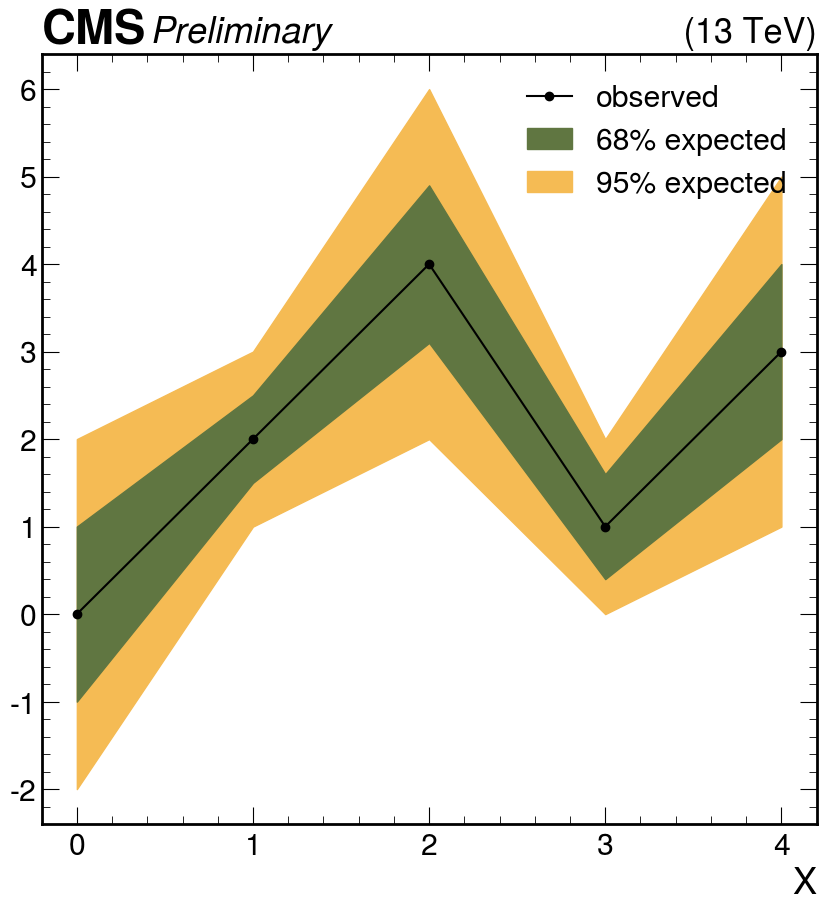

In [5]:
# Load CMS style including color-scheme (it's an editable dict)
plt.style.use(hep.style.CMS)

# Setup matplotlib figure
fig, ax = plt.subplots()

green = '#607641' 
yellow = '#F5BB54' 
plt.plot(x, y, color='k', marker='o', label = "observed", zorder=10)
plt.fill_between(np.asarray(x), 
                 np.asarray(y)+np.asarray(ey2), 
                 np.asarray(y)-np.asarray(ey2), color=green, label = "68% expected", zorder=3)
plt.fill_between(np.asarray(x), 
                 np.asarray(y)+np.asarray(ey), 
                 np.asarray(y)-np.asarray(ey), color=yellow, label = "95% expected")


# Style
hep.cms.label("Preliminary", data = True);

# Style
plt.legend()
ax.set_xlabel("X")

### CMS-logo colors

Text(1, 0, 'X')

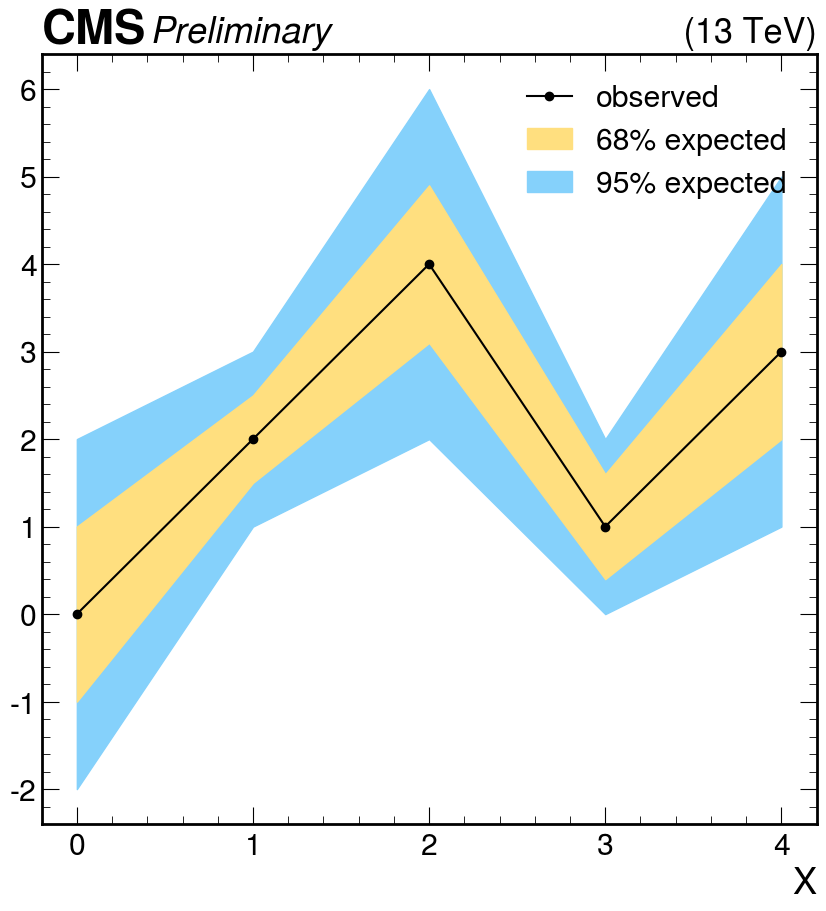

In [6]:
# Load CMS style including color-scheme (it's an editable dict)
plt.style.use(hep.style.CMS)

# Setup matplotlib figure
fig, ax = plt.subplots()

plt.plot(x, y, color='k', marker='o', label = "observed", zorder=10)
plt.fill_between(np.asarray(x), 
                 np.asarray(y)+np.asarray(ey2), 
                 np.asarray(y)-np.asarray(ey2), color = '#FFDF7Fff', label = "68% expected", zorder=3)
plt.fill_between(np.asarray(x), 
                 np.asarray(y)+np.asarray(ey), 
                 np.asarray(y)-np.asarray(ey), color = '#85D1FBff', label = "95% expected")


# Style
hep.cms.label("Preliminary", data = True);

# Style
plt.legend()
ax.set_xlabel("X")

## `cmsstyle`

### Yellow and green

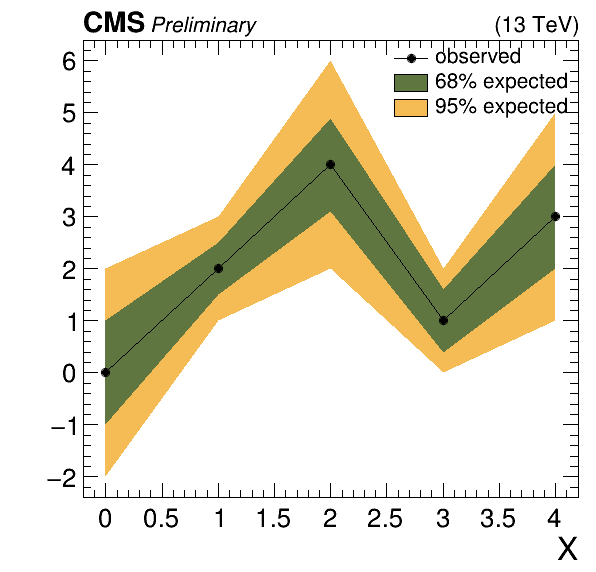

In [7]:
g = ROOT.TGraphErrors(5, array('d',x),  array('d',y))
ge = ROOT.TGraphErrors(5, array('d',x),  array('d',y), array('d',ex), array('d',ey))
ge2 = ROOT.TGraphErrors(5, array('d',x), array('d',y), array('d',ex), array('d',ey2))

# Styling
CMS.SetExtraText("Preliminary")
iPos = 0
canv_name = 'limit_root_1'
CMS.SetLumi("")
CMS.SetEnergy("13")
CMS.ResetAdditionalInfo()
canv = CMS.cmsCanvas(canv_name,-0.2,4.2,-2.4,6.4,"X","",square=CMS.kSquare,extraSpace=0.01,iPos=iPos)
leg = CMS.cmsLeg(0.65, 0.89 - 0.05 * 2, 0.97, 0.92, textSize=0.04)

leg.AddEntry(g, "observed","LP")
leg.AddEntry(ge2, "68% expected","F")
leg.AddEntry(ge, "95% expected","F")


CMS.cmsDraw(ge, "3", fcolor = ROOT.TColor.GetColor("#F5BB54"))
CMS.cmsDraw(ge2, "Same3L", fcolor = ROOT.TColor.GetColor("#607641"))
CMS.cmsDraw(g, "LP")

In [8]:
canv.Close()

### CMS-logo colors

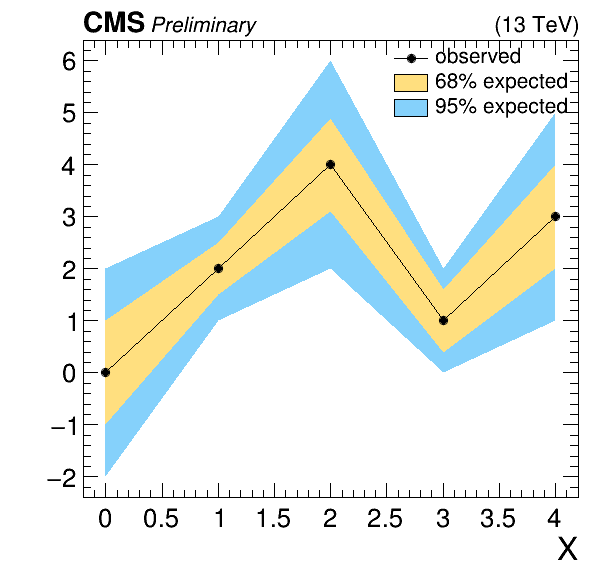

In [9]:
g = ROOT.TGraphErrors(5, array('d',x),  array('d',y))
ge = ROOT.TGraphErrors(5, array('d',x),  array('d',y), array('d',ex), array('d',ey))
ge2 = ROOT.TGraphErrors(5, array('d',x), array('d',y), array('d',ex), array('d',ey2))

# Styling
CMS.SetExtraText("Preliminary")
iPos = 0
canv_name = 'limit_root_2'
CMS.SetLumi("")
CMS.SetEnergy("13")
CMS.ResetAdditionalInfo()
canv = CMS.cmsCanvas(canv_name,-0.2,4.2,-2.4,6.4,"X","",square=CMS.kSquare,extraSpace=0.01,iPos=iPos)
leg = CMS.cmsLeg(0.65, 0.89 - 0.05 * 2, 0.97, 0.92, textSize=0.04)

leg.AddEntry(g, "observed","LP")
leg.AddEntry(ge2, "68% expected","F")
leg.AddEntry(ge, "95% expected","F")


CMS.cmsDraw(ge, "3", fcolor = ROOT.TColor.GetColor("#85D1FBff"))
CMS.cmsDraw(ge2, "Same3L", fcolor = ROOT.TColor.GetColor("#FFDF7Fff")  )
CMS.cmsDraw(g, "LP")

In [10]:
canv.Close()